In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import hypernetx as hnx
except ImportError:
    print("Installing HyperNetX.........")
    !pip install hypernetx --quiet 2> /dev/null
    print("Installation complete; please rerun this cell in order for the rest of the cells to use HyperNetX.")
    exit()

import warnings
warnings.simplefilter(action='ignore')

### GraphViz is arguably the best graph drawing tool, but it is old and tricky to install.
### Uncommenting the line below will get you slightly better layouts, if you can get it working...

# from networkx.drawing.nx_agraph import graphviz_layout as layout

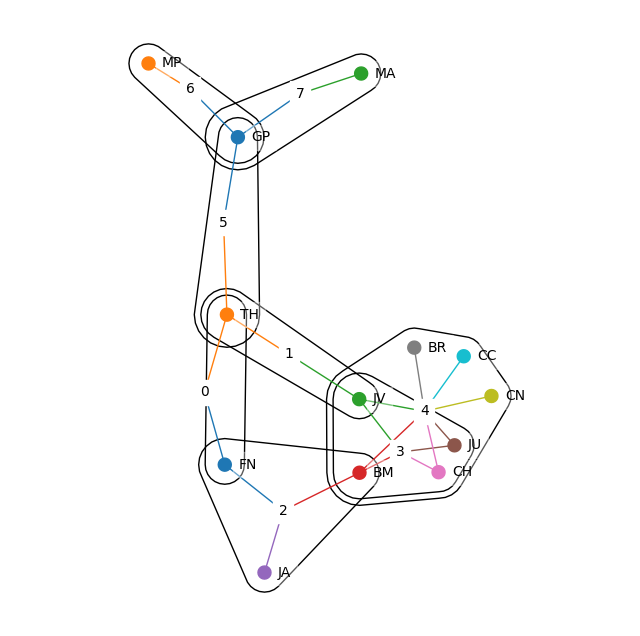

In [10]:
from importlib import reload; reload(hnx)

from collections import defaultdict

colors = defaultdict(lambda: plt.cm.tab10(len(colors)%10))

def get_node_color(v):
    return colors[v]

def get_cell_color(e):
    return get_node_color(e[1])

hnx.draw(
    H,
    with_additional_edges=H.bipartite(),
    edges_kwargs={'edgecolors': 'black'},
    nodes_kwargs={'color': get_node_color},
    additional_edges_kwargs={'edge_color': get_cell_color},
    edge_labels_on_edge=False, edge_label_alpha=1
)

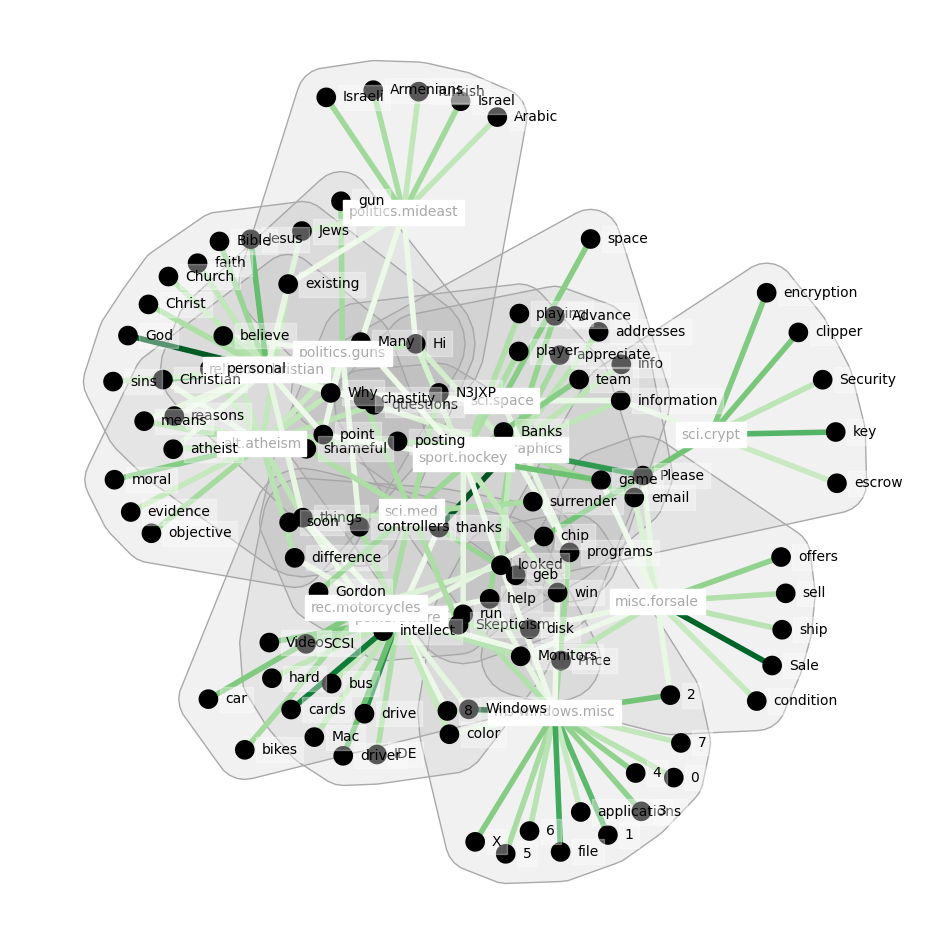

In [70]:
from importlib import reload; reload(hnx)

threshold = 0.1

df = pd.read_csv('./newsgroups-topics.csv', index_col=0)
df.index = df.index.map(lambda s: '.'.join(s.split('.')[-2:]))

incidence_matrix = df
# incidence_matrix = df[df.columns[(df >= threshold).sum(axis=0) > 1]]

H = hnx.Hypergraph(
    incidence_matrix\
        .apply(lambda row: row.index[row >= threshold].tolist(), axis=1)\
        .to_dict()
)

norm = plt.Normalize(0, incidence_matrix.max().max())
cmap = plt.cm.Greens

def get_cell_color(e):
    return cmap(norm(incidence_matrix.loc[e]))

plt.figure(figsize=(12, 12))
hnx.draw(
    H,
    layout=nx.kamada_kawai_layout,
    with_additional_edges=H.bipartite(),
    edges_kwargs={
        'edgecolors': 'darkgray',
        'facecolors': (.65, .65, .65, .15)
    },
    additional_edges_kwargs={
        'edge_color': get_cell_color,
        'width': 4,
    },
    edge_labels_on_edge=False, edge_label_alpha=1
)

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

In [2]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

# Visualization
Use the default drawing tool to visualize `H` and its dual. This renders an Euler diagram of the hypergraph where vertices are black dots and hyper edges are convex shapes containing the vertices belonging to the edge set. It is not always possible to render a "correct" Euler diagram for an arbitrary hypergraph. This technique will lead to false positives, cases where a hyper edge incorrectly contains a vertex not belonging to its set.

In [3]:
import networkx as nx

